**Project Title: Credit Card Fraud Detection**<br>
File No: 01

This notebook investigates credit card fraud detection on a highly imbalanced dataset. Exploratory Data Analysis (EDA) was performed to understand the distribution of fraudulent transactions, revealing only 0.17% fraud cases. Various models were applied to the unbalanced and balanced datasets to compare performance, including handling class imbalance with Random Over Sampling and applying different classification algorithms.

In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [1]:
#dataset google drive link:https://drive.google.com/file/d/15ekeiMCzPr7-rylXWOyUq9MWzQKwsDrH/view?usp=sharing


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#load dataset- creditcard.csv
df = pd.read_csv("/content/drive/MyDrive/Data Science Project/Credit Card Fraud Detection /creditcard.csv")


In [4]:
#view all columns
pd.set_option("display.max_columns",None)
#to display first 5 rows
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.shape

(284807, 31)

- So there are 31 columns and 284807 records in the dataframe

In [6]:
# Statistticalsummary of numeric features
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [7]:
# Checking null values
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [8]:
#checking datatype of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

**The dataset is clean, Let's perform EDA now**



**Exploratory Data Analysis -EDA**

In [9]:
# Checking imbalance in the target variable
df["Class"].value_counts()

,count
Class,
0,284315
1,492


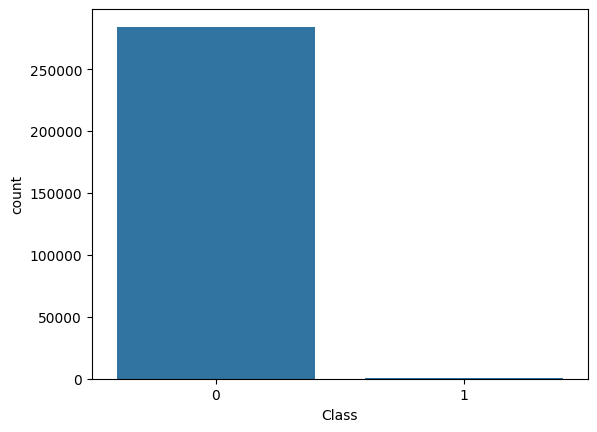

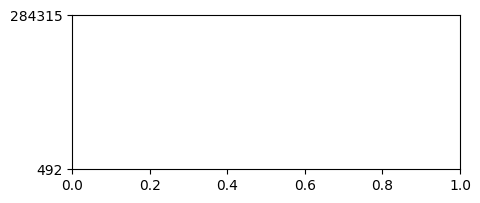

In [10]:
# Visualizing class imbalance
sns.countplot(data=df,x="Class")
plt.figure(figsize=(5,2))
c = df["Class"].value_counts()
plt.yticks(c)
plt.show()

In [11]:
# Calculating the percentage of fraud transactions
fraud_per = 492/(284315+492) * 100
print(f"fraud_percentage : {fraud_per}")

fraud_percentage : 0.1727485630620034


Only 0.17% transactions out of all the transactions are fraud. The data is highly imbalanced. Let's first apply our models without balancing it and if we don't get good results then we can find a way to balance the classes. But first, let's implement the model without it and will balance the data only if needed.

In [12]:
# Check how much average amount withdrawan during fraud transactions
fraud = df[df["Class"] == 1]
valid = df[df["Class"] == 0]
fraud.Amount.describe()

,Amount
count,492.000000
mean,122.211321
std,256.683288
min,0.000000
25%,1.000000
50%,9.250000
75%,105.890000
max,2125.870000


In [13]:
# Checking how much average amount is withdrawn during valid transactions
valid.Amount.describe()

,Amount
count,284315.000000
mean,88.291022
std,250.105092
min,0.000000
25%,5.650000
50%,22.000000
75%,77.050000
max,25691.160000


**Conclusion:** The average transaction amount for the fradulent transactions is more as compared to valid transactions.

**Univariate Analysis**

-------------- Time --------------


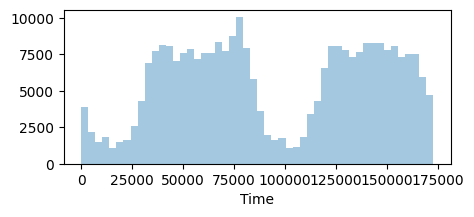

-------------- V1 --------------


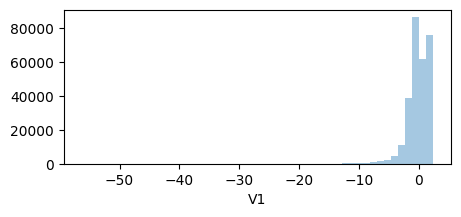

-------------- V2 --------------


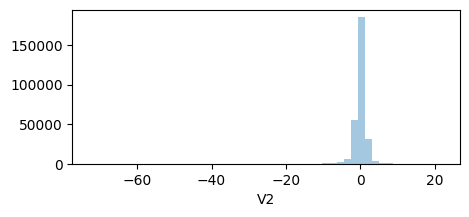

-------------- V3 --------------


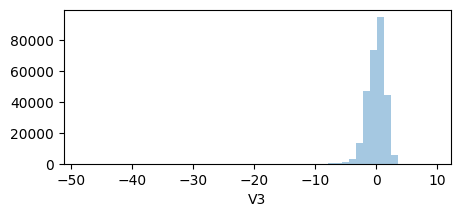

-------------- V4 --------------


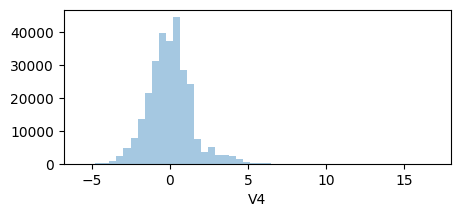

-------------- V5 --------------


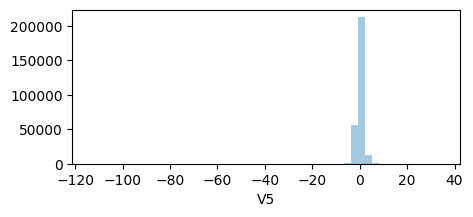

-------------- V6 --------------


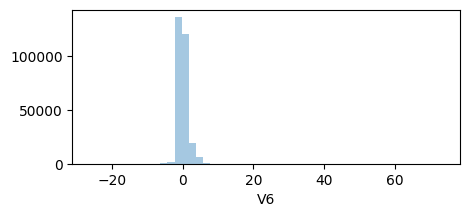

-------------- V7 --------------


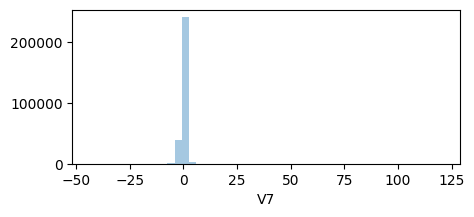

-------------- V8 --------------


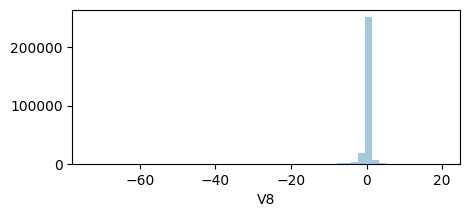

-------------- V9 --------------


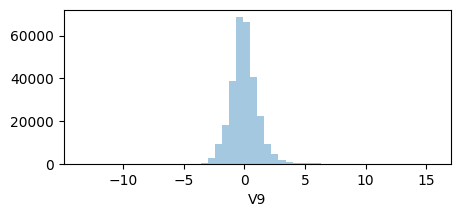

-------------- V10 --------------


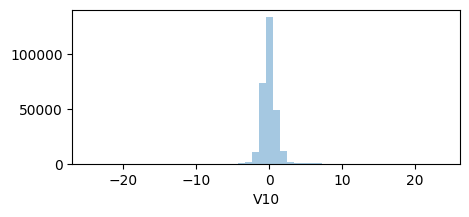

-------------- V11 --------------


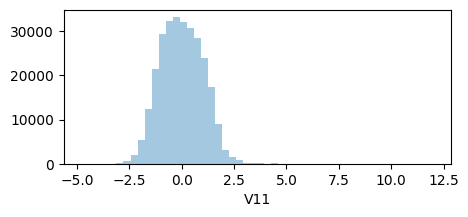

-------------- V12 --------------


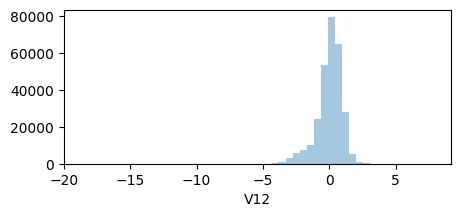

-------------- V13 --------------


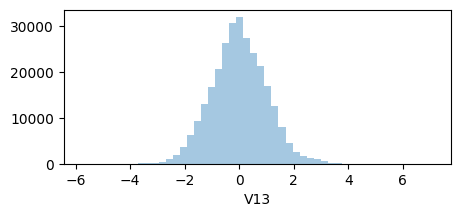

-------------- V14 --------------


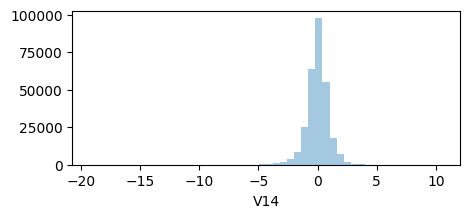

-------------- V15 --------------


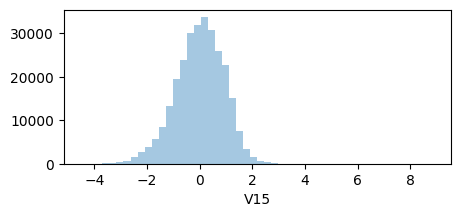

-------------- V16 --------------


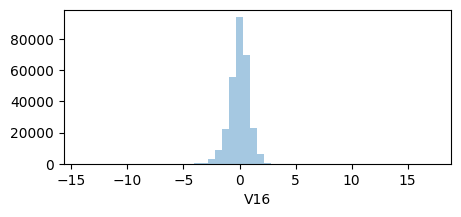

-------------- V17 --------------


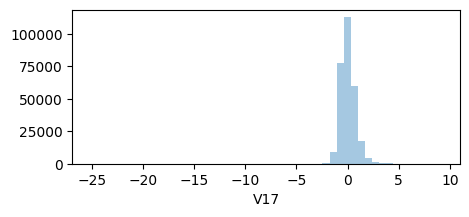

-------------- V18 --------------


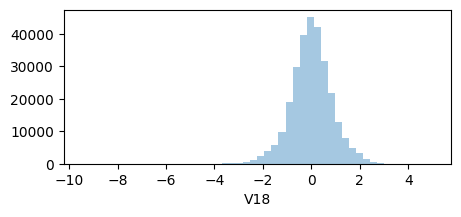

-------------- V19 --------------


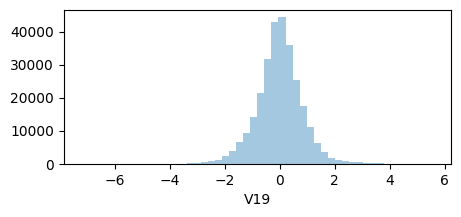

-------------- V20 --------------


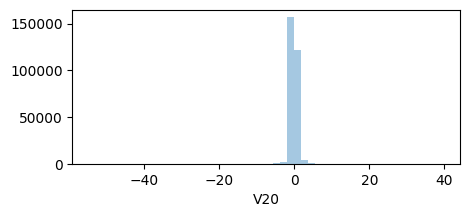

-------------- V21 --------------


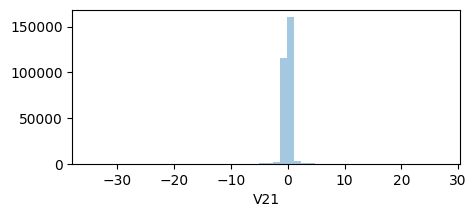

-------------- V22 --------------


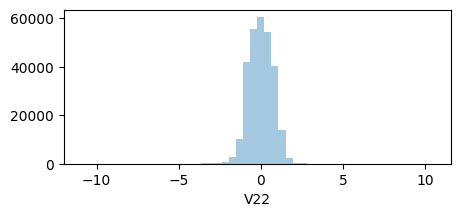

-------------- V23 --------------


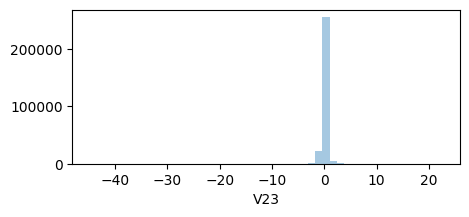

-------------- V24 --------------


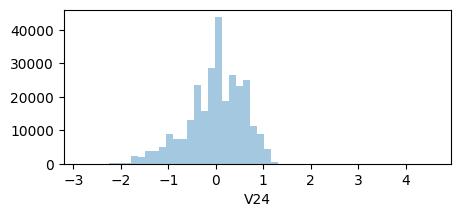

-------------- V25 --------------


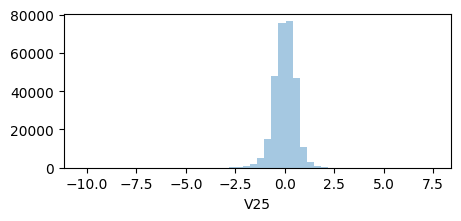

-------------- V26 --------------


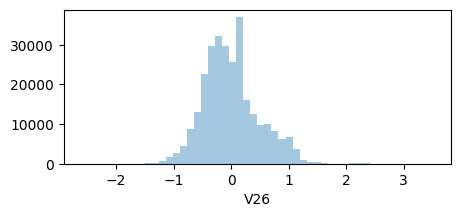

-------------- V27 --------------


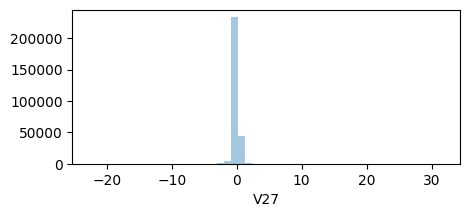

-------------- V28 --------------


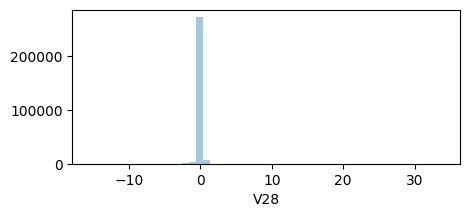

-------------- Amount --------------


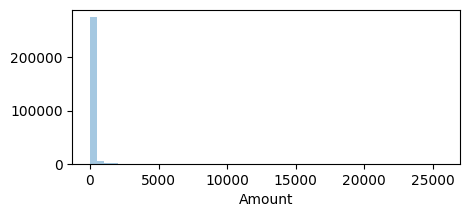

-------------- Class --------------


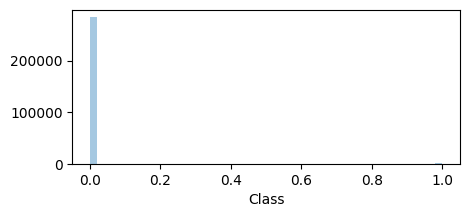

In [14]:
for col in df:
  print('--------------',col,'--------------')
  plt.figure(figsize=(5, 2))
  sns.distplot(a=df[col],kde=False)
  plt.show()

Visualizing the outliers in all the columns using boxplot

--------------- Time ---------------


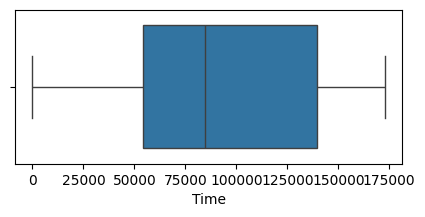

--------------- V1 ---------------


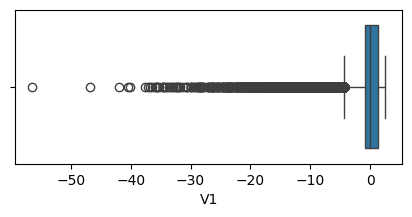

--------------- V2 ---------------


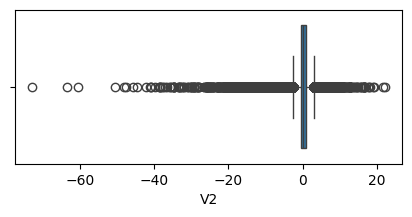

--------------- V3 ---------------


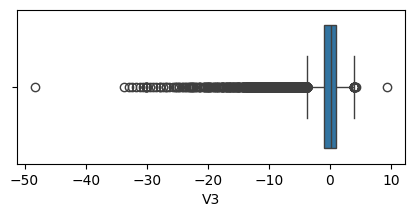

--------------- V4 ---------------


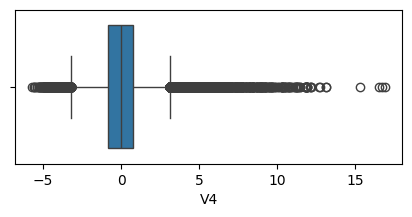

--------------- V5 ---------------


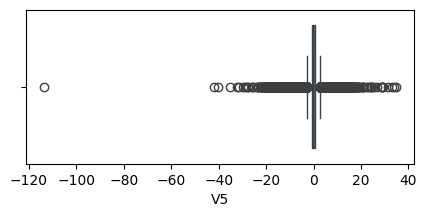

--------------- V6 ---------------


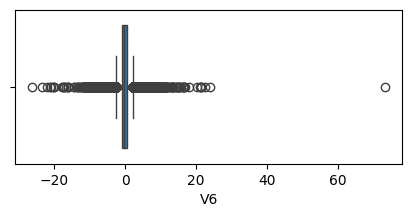

--------------- V7 ---------------


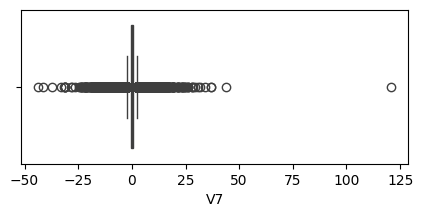

--------------- V8 ---------------


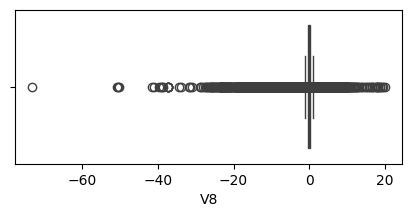

--------------- V9 ---------------


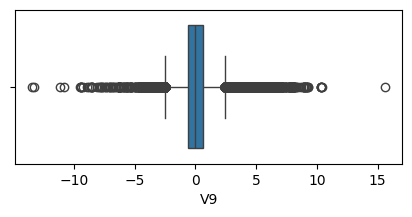

--------------- V10 ---------------


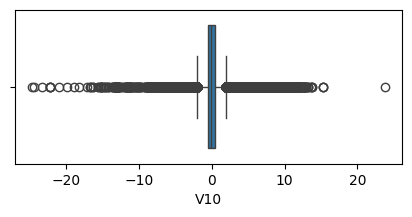

--------------- V11 ---------------


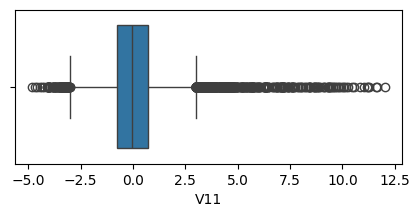

--------------- V12 ---------------


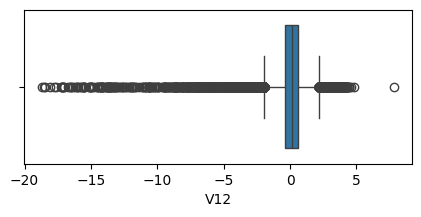

--------------- V13 ---------------


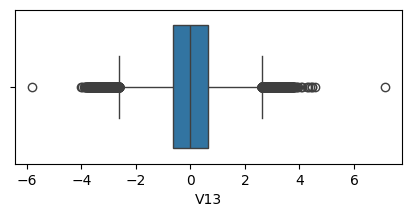

--------------- V14 ---------------


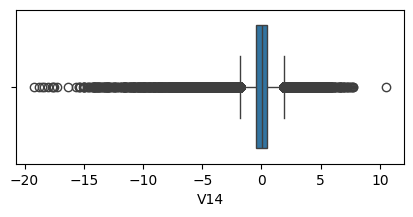

--------------- V15 ---------------


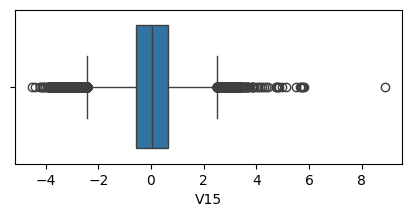

--------------- V16 ---------------


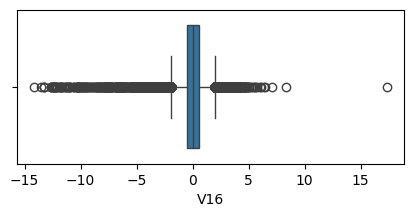

--------------- V17 ---------------


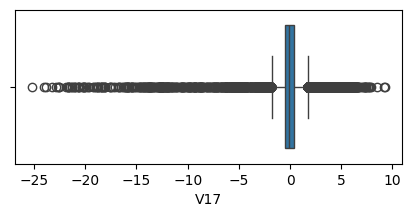

--------------- V18 ---------------


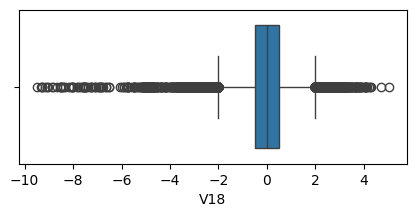

--------------- V19 ---------------


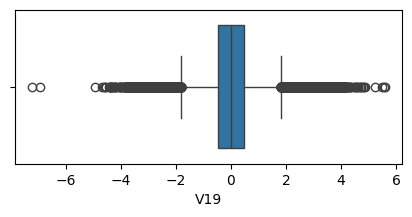

--------------- V20 ---------------


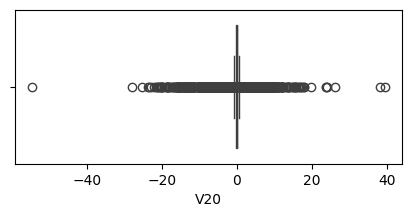

--------------- V21 ---------------


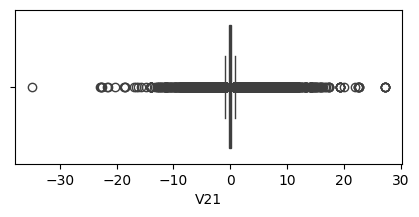

--------------- V22 ---------------


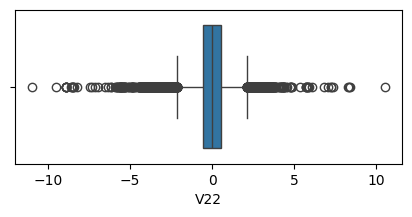

--------------- V23 ---------------


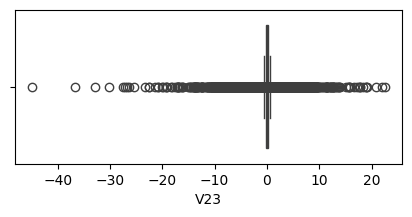

--------------- V24 ---------------


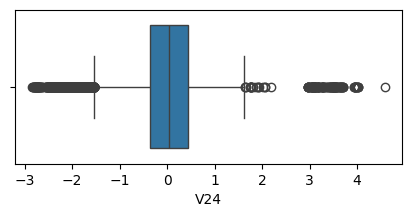

--------------- V25 ---------------


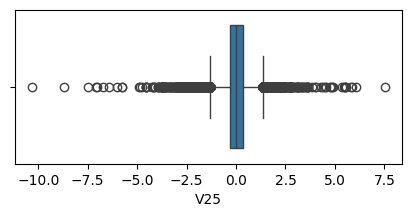

--------------- V26 ---------------


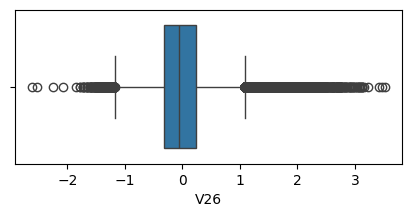

--------------- V27 ---------------


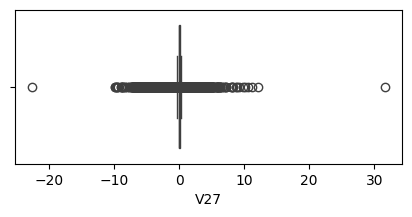

--------------- V28 ---------------


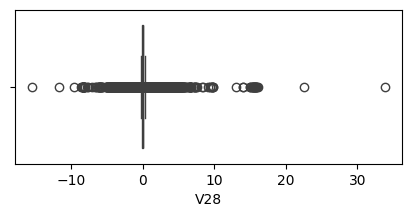

--------------- Amount ---------------


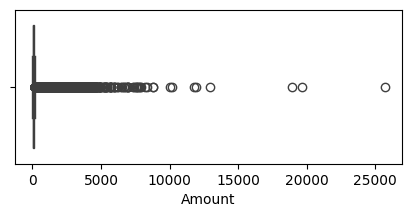

--------------- Class ---------------


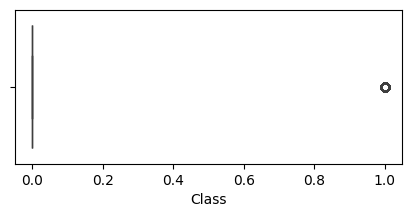

In [15]:
for col in df:
  print('---------------',col,'---------------')
  plt.figure(figsize=(5,2))
  sns.boxplot(x=df[col])
  plt.show()

Visualizing the skewness of all the columns in a dataframe

In [16]:
from scipy.stats import skew

Time skewness: -0.03556743068120296


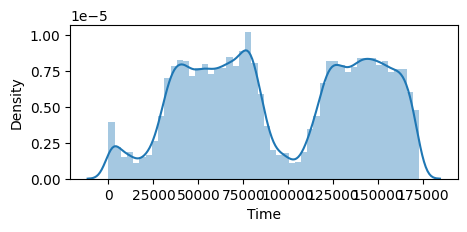

V1 skewness: -3.280650024359956


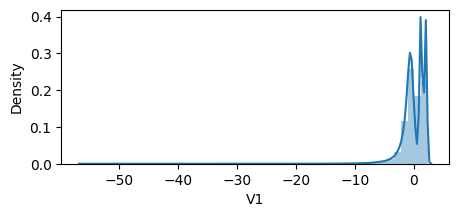

V2 skewness: -4.624841215356954


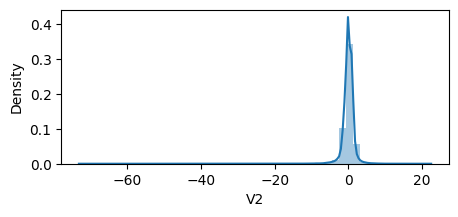

V3 skewness: -2.2401436419416543


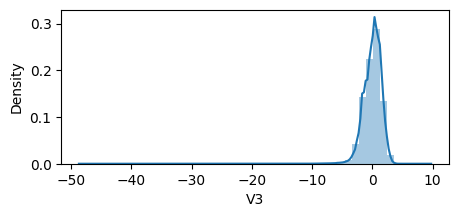

V4 skewness: 0.6762885361363855


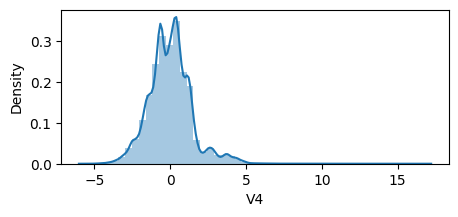

V5 skewness: -2.425888719378559


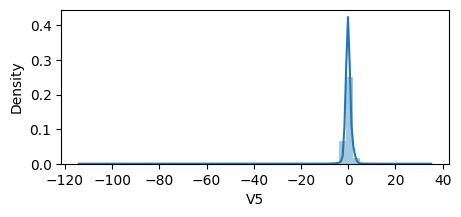

V6 skewness: 1.8265710448869008


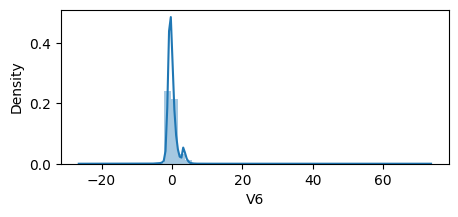

V7 skewness: 2.5538939666831117


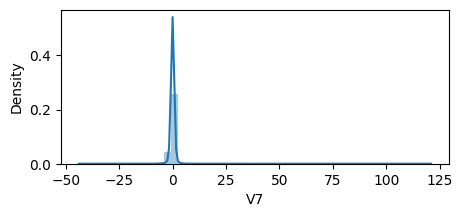

V8 skewness: -8.521899311980174


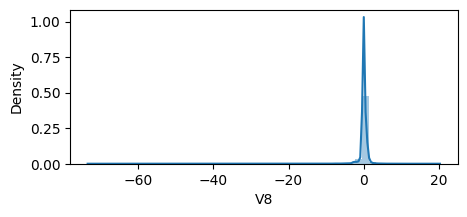

V9 skewness: 0.5546768505565418


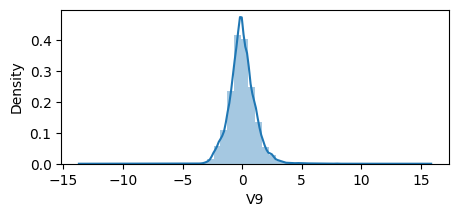

V10 skewness: 1.1871343376109698


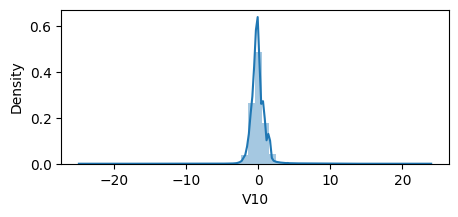

V11 skewness: 0.35650397786795557


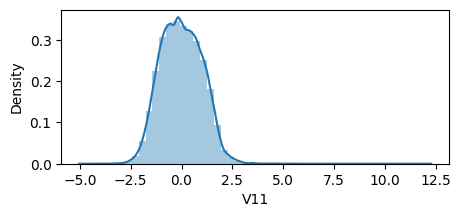

V12 skewness: -2.278388935683072


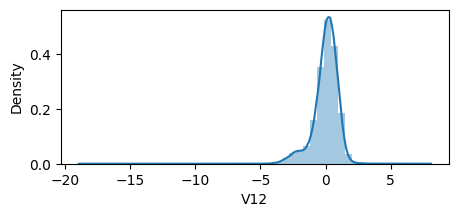

V13 skewness: 0.0652331143394307


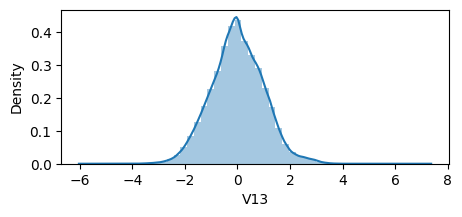

V14 skewness: -1.9951653322115102


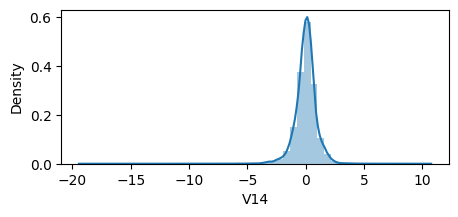

V15 skewness: -0.3084213577546761


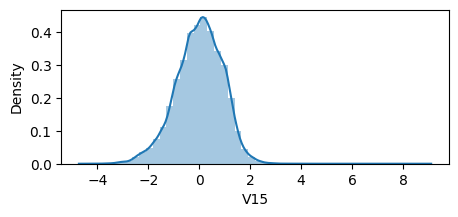

V16 skewness: -1.1009604775565411


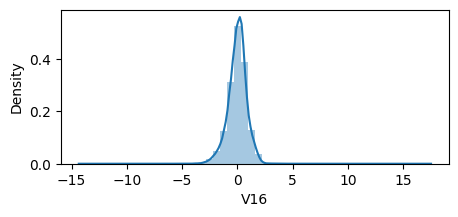

V17 skewness: -3.844894223735797


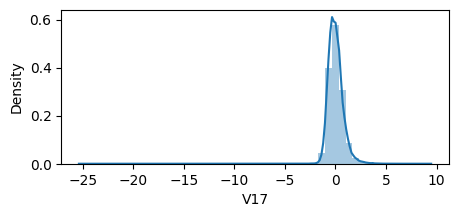

V18 skewness: -0.2598788993745328


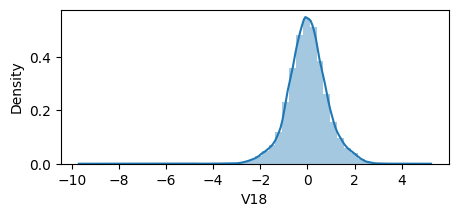

V19 skewness: 0.109191184897714


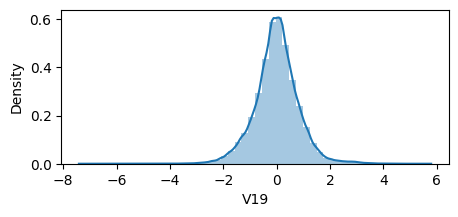

V20 skewness: -2.0371445699300117


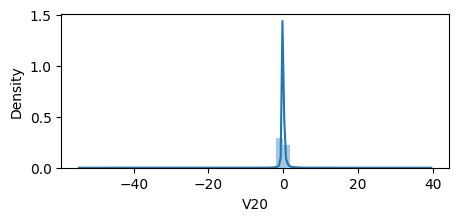

V21 skewness: 3.5929722697554753


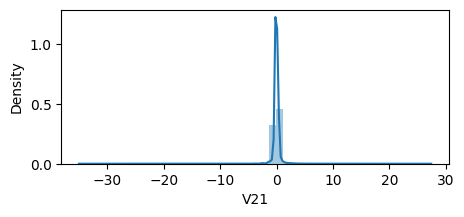

V22 skewness: -0.21325649967250146


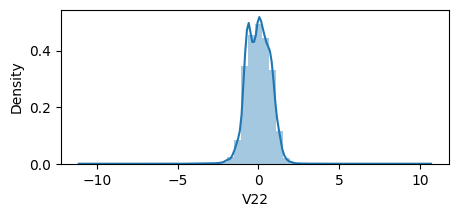

V23 skewness: -5.875109397316075


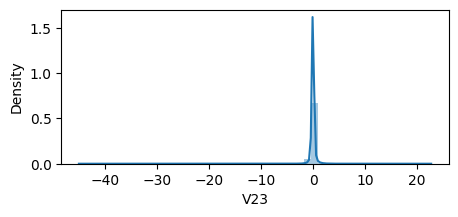

V24 skewness: -0.5524963913014509


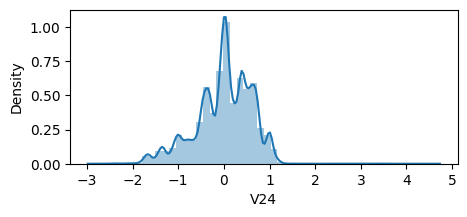

V25 skewness: -0.41579040044741566


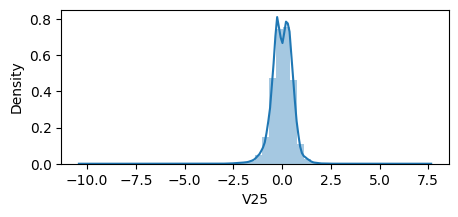

V26 skewness: 0.5766895799228516


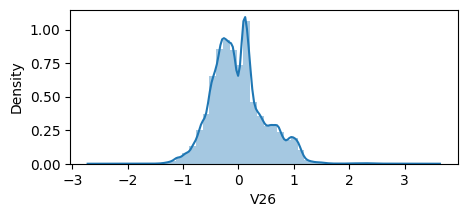

V27 skewness: -1.170202779255609


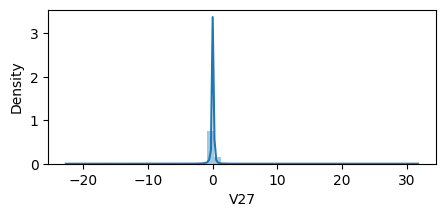

V28 skewness: 11.19203224646587


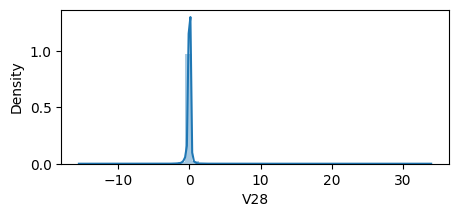

Amount skewness: 16.97763503663315


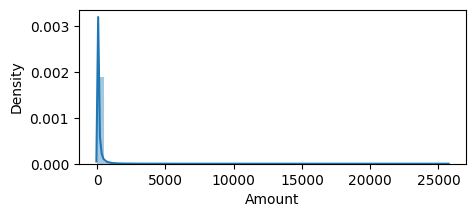

Class skewness: 23.99745292182408


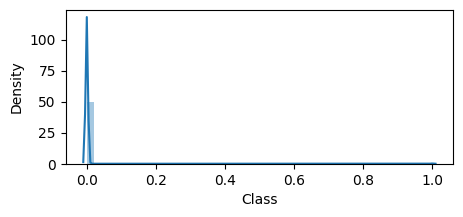

In [17]:
for col in df:
  print(col,'skewness:',skew(df[col]))
  plt.figure(figsize=(5,2))
  sns.distplot(a=df[col])
  plt.show()

**Bi-Variate Analysis**

Time


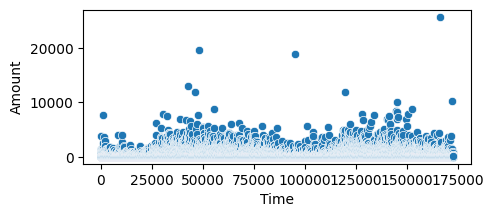

V1


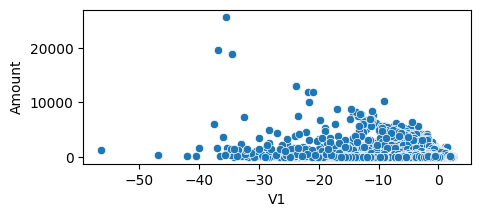

V2


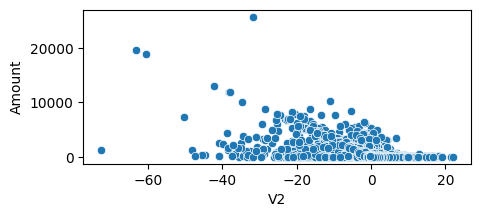

V3


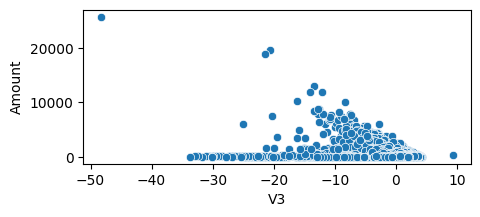

V4


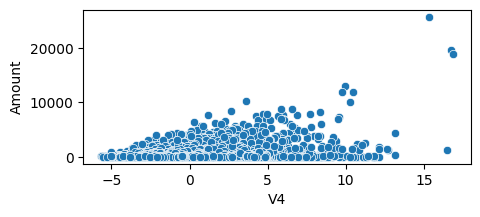

V5


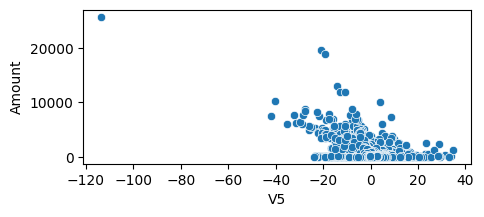

V6


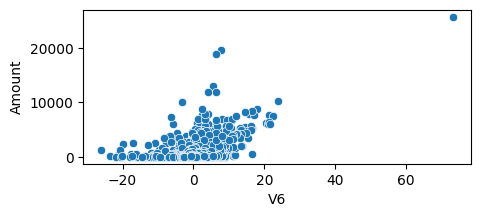

V7


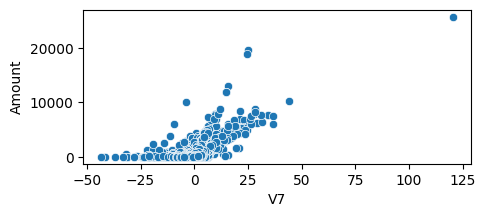

V8


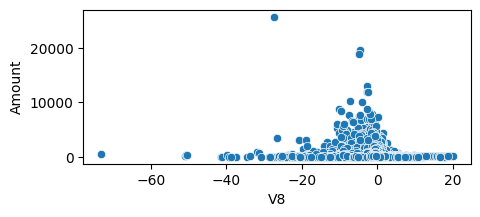

V9


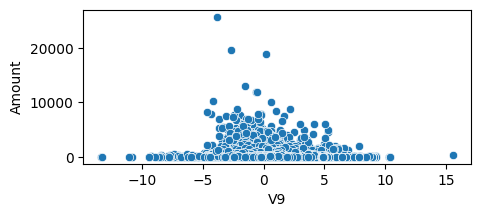

V10


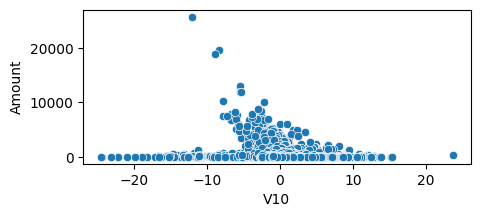

V11


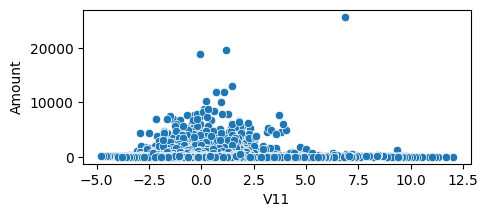

V12


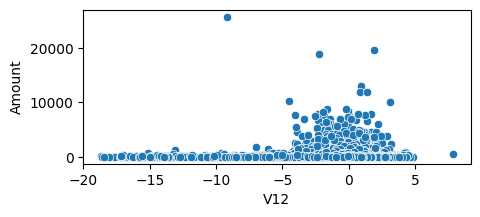

V13


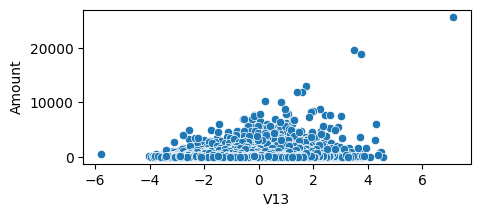

V14


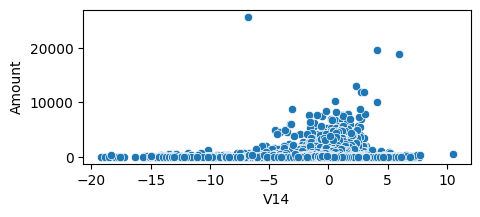

V15


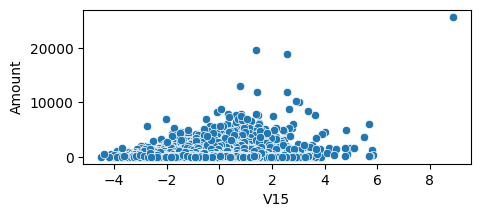

V16


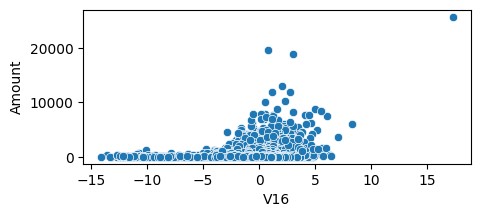

V17


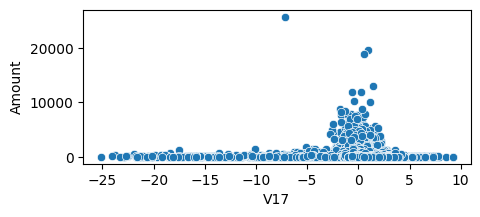

V18


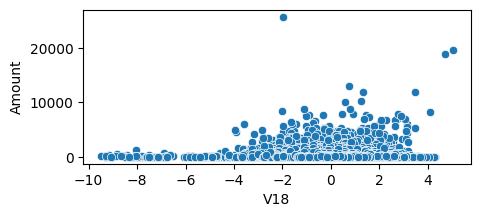

V19


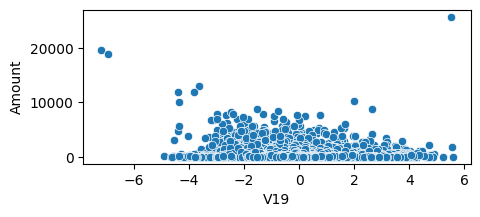

V20


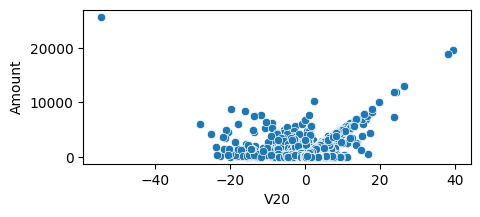

V21


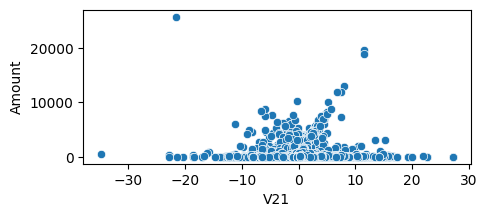

V22


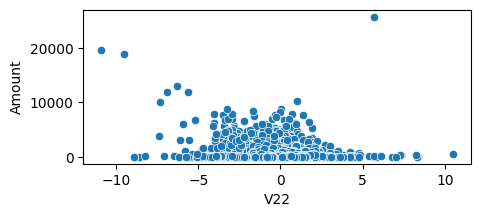

V23


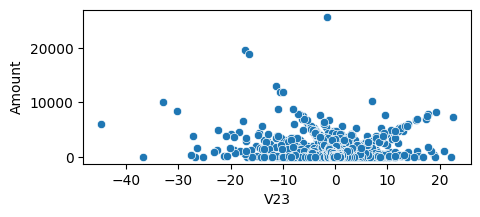

V24


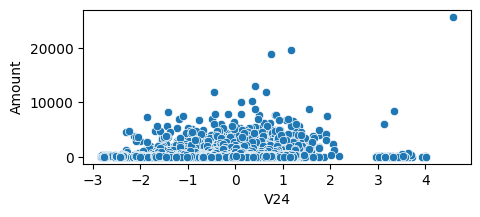

V25


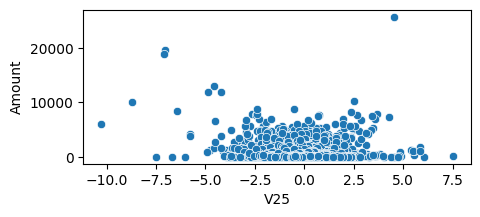

V26


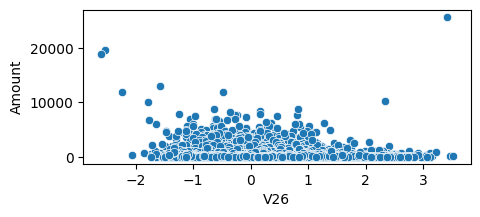

V27


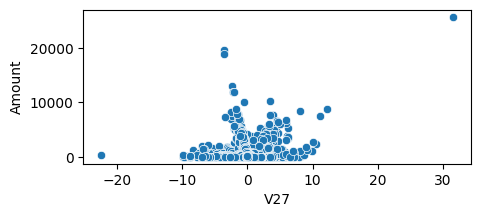

V28


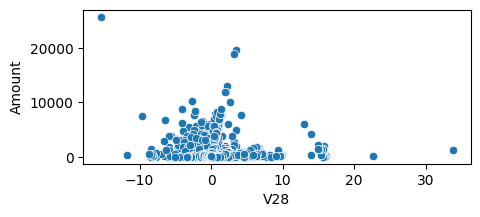

Amount


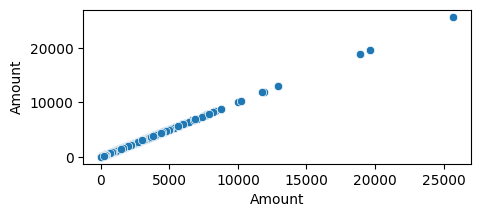

Class


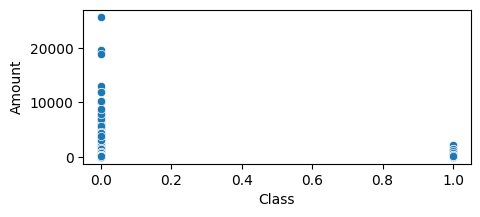

In [18]:
for col in df:
  print(col)
  plt.figure(figsize=(5,2))
  sns.scatterplot(x=df[col],y=df['Amount'])
  plt.show()

In [ ]:
df

In [19]:
# Checking correlation of features with target variable i.e. class
# 0.5 to 1 means good positive correlation
# -0.5 to -1 means good negative correlation

df.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,3.061663e-02,-2.476894e-01,1.243481e-01,-6.590202e-02,-9.875682e-02,-1.834533e-01,1.190287e-02,-7.329721e-02,9.043813e-02,2.897530e-02,-5.086602e-02,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.135835e-16,-1.227819e-15,-9.215150e-16,1.812612e-17,-6.506567e-16,-1.005191e-15,-2.433822e-16,-1.513678e-16,7.388135e-17,2.125498e-16,2.053457e-16,-2.425603e-17,-5.020280e-16,3.547782e-16,7.212815e-17,-3.879840e-16,3.230206e-17,1.502024e-16,4.654551e-16,-2.457409e-16,-4.290944e-16,6.168652e-16,-4.425156e-17,-9.605737e-16,-1.581290e-17,1.198124e-16,2.083082e-15,-0.227709,-0.101347
V2,-0.010593,4.135835e-16,1.000000e+00,3.243764e-16,-1.121065e-15,5.157519e-16,2.787346e-16,2.055934e-16,-5.377041e-17,1.978488e-17,-3.991394e-16,1.975426e-16,-9.568710e-17,6.295388e-16,-1.730566e-16,-4.995814e-17,1.177316e-17,-2.685296e-16,3.284605e-16,-7.118719e-18,2.506675e-16,-8.480447e-17,1.526333e-16,1.634231e-16,1.247925e-17,-4.478846e-16,2.057310e-16,-4.966953e-16,-5.093836e-16,-0.531409,0.091289
V3,-0.419618,-1.227819e-15,3.243764e-16,1.000000e+00,4.711293e-16,-6.539009e-17,1.627627e-15,4.895305e-16,-1.268779e-15,5.568367e-16,1.156587e-15,1.576830e-15,6.310231e-16,2.807652e-16,4.739859e-16,9.068793e-16,8.299445e-16,7.614712e-16,1.509897e-16,3.463522e-16,-9.316409e-16,5.706192e-17,-1.133902e-15,-4.983035e-16,2.686834e-19,-1.104734e-15,-1.238062e-16,1.045747e-15,9.775546e-16,-0.210880,-0.192961
V4,-0.105260,-9.215150e-16,-1.121065e-15,4.711293e-16,1.000000e+00,-1.719944e-15,-7.491959e-16,-4.104503e-16,5.697192e-16,6.923247e-16,2.232685e-16,3.459380e-16,-5.625518e-16,1.303306e-16,2.282280e-16,1.377649e-16,-9.614528e-16,-2.699612e-16,-5.103644e-16,-3.980557e-16,-1.857247e-16,-1.949553e-16,-6.276051e-17,9.164206e-17,1.584638e-16,6.070716e-16,-4.247268e-16,3.977061e-17,-2.761403e-18,0.098732,0.133447
V5,0.173072,1.812612e-17,5.157519e-16,-6.539009e-17,-1.719944e-15,1.000000e+00,2.408382e-16,2.715541e-16,7.437229e-16,7.391702e-16,-5.202306e-16,7.203963e-16,7.412552e-16,5.886991e-16,6.565143e-16,-8.720275e-16,2.246261e-15,1.281914e-16,5.308590e-16,-1.450421e-16,-3.554057e-16,-3.920976e-16,1.253751e-16,-8.428683e-18,-1.149255e-15,4.808532e-16,4.319541e-16,6.590482e-16,-5.613951e-18,-0.386356,-0.094974
V6,-0.063016,-6.506567e-16,2.787346e-16,1.627627e-15,-7.491959e-16,2.408382e-16,1.000000e+00,1.191668e-16,-1.104219e-16,4.131207e-16,5.932243e-17,1.980503e-15,2.375468e-16,-1.211182e-16,2.621312e-16,-1.531188e-15,2.623672e-18,2.015618e-16,1.223814e-16,-1.865597e-16,-1.858755e-16,5.833316e-17,-4.705235e-19,1.046712e-16,-1.071589e-15,4.562861e-16,-1.357067e-16,-4.452461e-16,2.594754e-16,0.215981,-0.043643
V7,0.084714,-1.005191e-15,2.055934e-16,4.895305e-16,-4.104503e-16,2.715541e-16,1.191668e-16,1.000000e+00,3.344412e-16,1.122501e-15,-7.492834e-17,1.425248e-16,-3.536655e-18,1.266462e-17,2.607772e-16,-1.690540e-16,5.869302e-17,2.177192e-16,7.604126e-17,-1.881008e-16,9.379684e-16,-2.027779e-16,-8.898922e-16,-4.387401e-16,7.434913e-18,-3.094082e-16,-9.657637e-16,-1.782106e-15,-2.776530e-16,0.397311,-0.187257
V8,-0.036949,-2.433822e-16,-5.377041e-17,-1.268779e-15,5.697192e-16,7.437229e-16,-1.104219e-16,3.344412e-16,1.000000e+00,4.356078e-16,-2.801370e-16,2.487043e-16,1.839891e-16,-2.921856e-16,-8.599156e-16,4.127777e-16,-5.254741e-16,-2.269549e-16,-3.667974e-16,-3.875186e-16,2.033737e-16,3.892798e-16,2.026927e-16,6.377260e-17,-1.047097e-16,-4.653279e-16,-1.727276e-16,1.299943e-16,-6.200930e-16,-0.103079,0.019875
V9,-0.008660,-1.513678e-16,1.978488e-17,5.568367e-16,6.923247e-16,7.391702e-16,4.131207e-16,1.122501e-15,4.356078e-16,1.000000e+00,-4.642274e-16,1.354680e-16,-1.079314e-15,2.251072e-15,3.784757e-15,

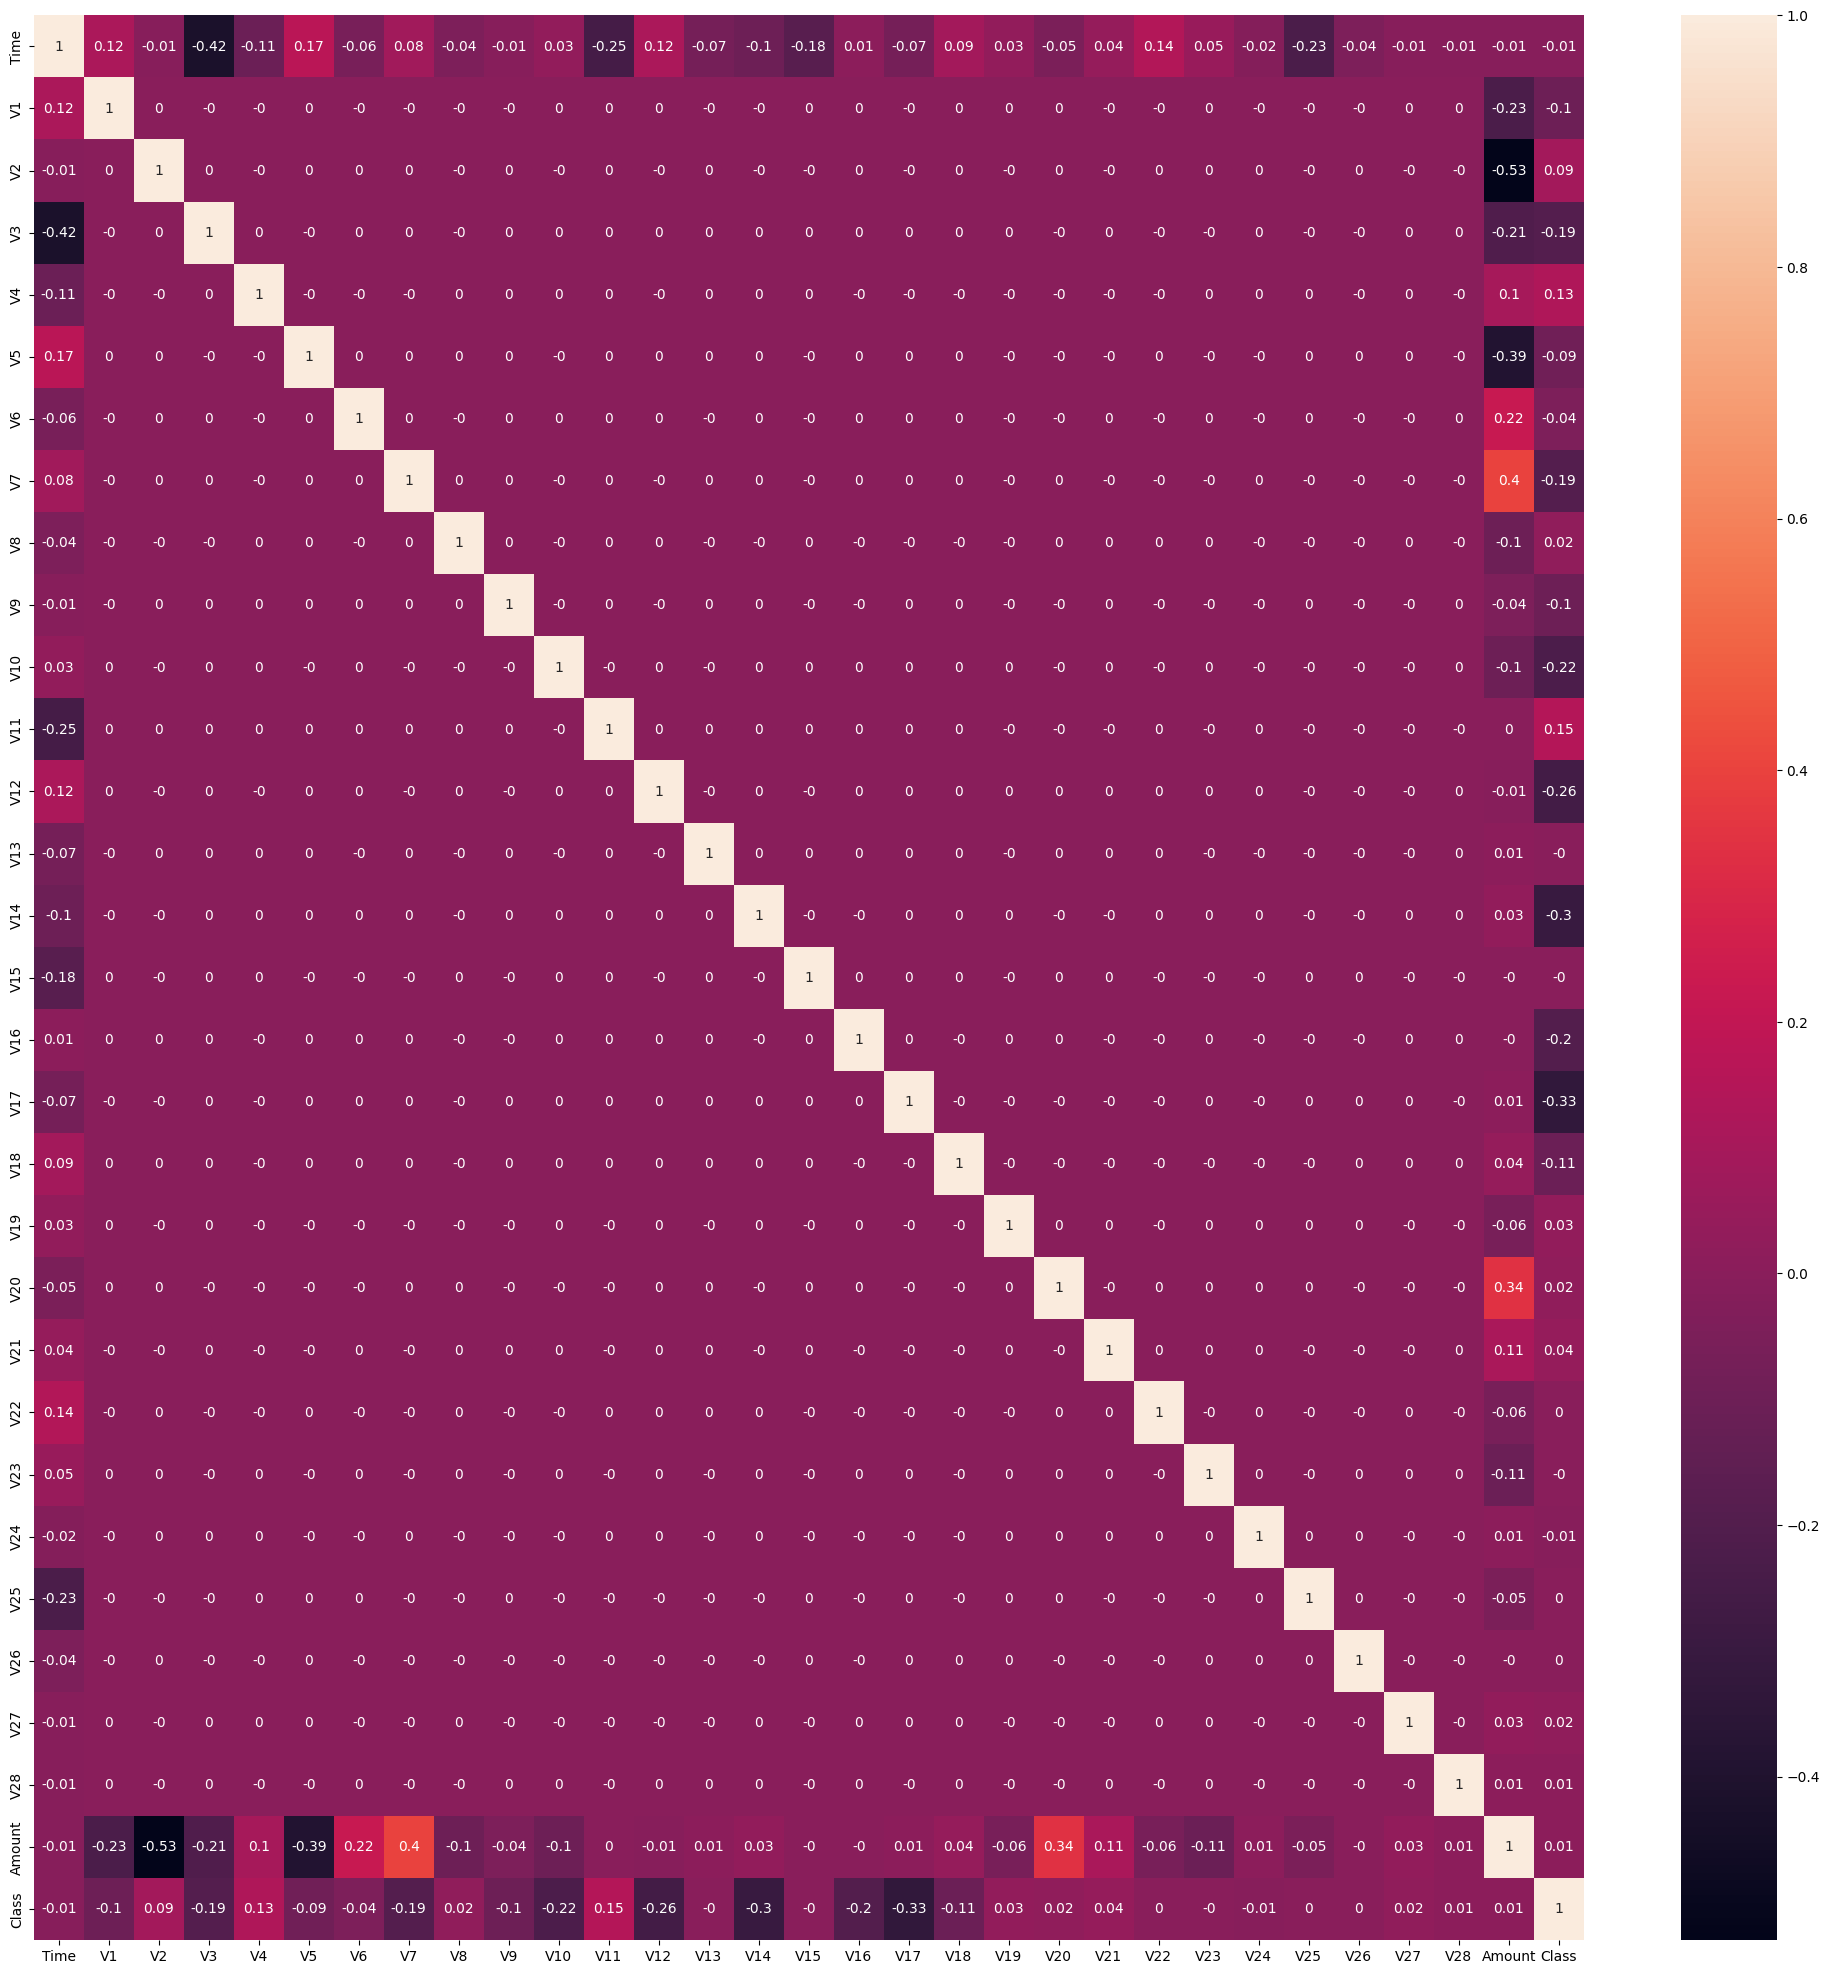

In [20]:
# Visualizing the correlation
plt.figure(figsize=(25,25))
sns.heatmap(df.corr().round(2),annot=True)
plt.show()

- In the heatmap above we can clearly see that most of the features do not correlate to each other but there are some features that either have a positive or negative correlation with each other.
- V2 and V5 are highly negatively correlated with the feature callled 'Amount'. We also see some positive correlation with V7, V20 and 'Amount'

***
1. Correlation between 'Amount' and V2 is good negative corr.
2. Correlation between 'Amount' and V5 is -0.39 negative corr.
3. Correlation between 'Amount' and V7 is 0.4 positive corr.
4. Correlation between 'Amount' and V20 is 0.34 positive corr.
***



In [21]:
# Checking the negative values in each columns for selecting the transaformation method
for col in df:
  d = df[df[col] < 0]
  print(col)
  print(d)

Time
Empty DataFrame
Columns: [Time, V1, V2, V3, V4, V5, V6, V7, V8, V9, V10, V11, V12, V13, V14, V15, V16, V17, V18, V19, V20, V21, V22, V23, V24, V25, V26, V27, V28, Amount, Class]
Index: []
V1
            Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
5            2.0  -0.425966   0.960523  1.141109 -0.168252  0.420987   
...          ...        ...        ...       ...       ...       ...   
284799  172783.0  -1.775135  -0.004235  1.189786  0.331096  1.196063   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  1727

**There are negative values in the features so we can not apply sqrt or log transformation to reduce the skewness in the data.**

-> Separating independent variable (input variable i.e. x and dependent variable (target/ output) i.e. Y.

In [22]:
X = df.drop("Class",axis=1)   # to store all the inputs hold in X variable apart from 'Class'
Y = df["Class"]               # to store only 'Class' column

**Standardization**

In [23]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit_transform(X)

array([[-1.99658302, -0.69424232, -0.04407492, ...,  0.33089162,
        -0.06378115,  0.24496426],
       [-1.99658302,  0.60849633,  0.16117592, ..., -0.02225568,
         0.04460752, -0.34247454],
       [-1.99656197, -0.69350046, -0.81157783, ..., -0.13713686,
        -0.18102083,  1.16068593],
       ...,
       [ 1.6419735 ,  0.98002374, -0.18243372, ...,  0.01103672,
        -0.0804672 , -0.0818393 ],
       [ 1.6419735 , -0.12275539,  0.32125034, ...,  0.26960398,
         0.31668678, -0.31324853],
       [ 1.64205773, -0.27233093, -0.11489898, ..., -0.00598394,
         0.04134999,  0.51435531]])

**Splitting our dataset in tarin and test in the proportion 70% & 30%**

In [41]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=1)


Creating a function so we can train our model with different algorithms to get best of it.

In [42]:

def create_model(model):
  model.fit(X_train,Y_train)
  Y_pred = model.predict(X_test)
  print(classification_report(Y_test,Y_pred))
  print("Confusion Matrix: ")
  print(confusion_matrix(Y_test,Y_pred))
  return model


In [43]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression

**Creating A Base Model**

**1. Logistic Regression**

In [44]:
# First train the mdel with basic algorithm logistic Regression
# Create object of the Logistic Regression
lr = LogisticRegression()

# call the function
lr = create_model(lr)

#!

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85308
           1       0.67      0.62      0.65       135

    accuracy                           1.00     85443
   macro avg       0.84      0.81      0.82     85443
weighted avg       1.00      1.00      1.00     85443

Confusion Matrix: 
[[85267    41]
 [   51    84]]


**2. Random Forest**

In [45]:
# Now we'll uae RandomForestClassifier which is better than simple decision tree
from sklearn.ensemble import RandomForestClassifier

In [46]:
# Create object of RandomForestClassifer
rfc = RandomForestClassifier(n_estimators=45,max_features =4, random_state = 1)

# n_estimators number of 45 and max_features = 4
# It creates 45 decision trees with these 4 features and takes the average of it to predict the model


In [47]:
# calling the function
create_model(rfc)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85308
           1       0.91      0.76      0.83       135

    accuracy                           1.00     85443
   macro avg       0.96      0.88      0.92     85443
weighted avg       1.00      1.00      1.00     85443

Confusion Matrix: 
[[85298    10]
 [   32   103]]


RandomForestClassifier(max_features=4, n_estimators=45, random_state=1)

**3. Gradient Boosting**

In [48]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=30)

In [49]:
# Calling th function
create_model(gbc)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85308
           1       0.67      0.21      0.33       135

    accuracy                           1.00     85443
   macro avg       0.84      0.61      0.66     85443
weighted avg       1.00      1.00      1.00     85443

Confusion Matrix: 
[[85294    14]
 [  106    29]]


GradientBoostingClassifier(n_estimators=30)

**4. XG Boost**

In [50]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=30,reg_alpha=1)

# reg_alpha = 1
# automatically handle overfitting situation alpha or lambda means hyperparameter and handle the outliers automatically
# n_estimators = 100 means no. of iterations can be <=100

In [51]:
# Calling the function
create_model(xgb)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85308
           1       0.91      0.77      0.84       135

    accuracy                           1.00     85443
   macro avg       0.96      0.89      0.92     85443
weighted avg       1.00      1.00      1.00     85443

Confusion Matrix: 
[[85298    10]
 [   31   104]]


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=30, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

-> By using Extreme Gradient Boost and Random Forest classifer we got good F1 score as compared to the other models without balancing the dataset

Now we'll first balance the dataset and then train the model

For balancing the dataset we need to import **imblearn package**

Here,
No: Majority class and Yes: Minority class means data is imbalanced. So we have to balance the output variable.

-> To balance the output variable we will use sampling techniques.

- There are two sampling techniques:
  1. Random Under Sampling
  2. Random Over Sammpling

If you are reducing the majority class then that is known as 'Under Sampling' and if you are increasing the minority class then that is known as 'Over Sampling'.

In [52]:
from imblearn.under_sampling import RandomUnderSampler


**Under Sampling**

In [53]:
# For converting the majority class to minority class we use RandomUnderSampler
# Here in this datatset: Majority class: No and Minority Class: Yes
# Create object of RandomUnderSampler() class

rus = RandomUnderSampler()


In [54]:
# We have target: 70% : Y_train means tarining dataand 30% : Y_test means testing data
pd.Series(Y_train).value_counts()

,count
Class,
0,199007
1,357


In [55]:
# fit_sample() inbuilt function which defines RandomUnderSampler classand passes the taring data
# We have X_train and Y_train (70%)
X_sample_train,Y_sample_train = rus.fit_resample(X_train,Y_train)

In [56]:
# Check
pd.Series(Y_sample_train).value_counts()

,count
Class,
0,357
1,357


**Logistic Regression**

In [57]:
# We train the model with the help of Logistic Rgression after applying RandomUnderSampler
# Creating the object of Logistic Regression class
lr = LogisticRegression()

In [58]:
# train: use fit()
# test: predict()
# classification problem: report generate: use classification report
# creating user defined function

def create_model1(model):
  model.fit(X_sample_train,Y_sample_train)  # Training the model
  y_pred = model.predict(X_test)            # test
  print(classification_report(Y_test,y_pred))
  print("Confusion matrix: ")
  print(confusion_matrix(Y_test,y_pred))
  return model


In [59]:
# Calling the function
create_model1(lr)

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     85308
           1       0.04      0.88      0.07       135

    accuracy                           0.96     85443
   macro avg       0.52      0.92      0.52     85443
weighted avg       1.00      0.96      0.98     85443

Confusion matrix: 
[[82098  3210]
 [   16   119]]


LogisticRegression()

**Decision Tree**

In [60]:
# Applying DecisionTreeClassifier: This is algorithm is selected for classification, It helps to select important features to predict the o/p without manually doing data analysis to select important features.
from sklearn.tree import DecisionTreeClassifier

In [61]:
# Creating object of DecisionTreeClassifier class
dt1 = DecisionTreeClassifier(max_depth=6)   #By default gini index method is selected to select imp. features

# Calling the function
dt1 = create_model1(dt1)

              precision    recall  f1-score   support

           0       1.00      0.94      0.97     85308
           1       0.02      0.86      0.04       135

    accuracy                           0.94     85443
   macro avg       0.51      0.90      0.51     85443
weighted avg       1.00      0.94      0.97     85443

Confusion matrix: 
[[80036  5272]
 [   19   116]]


In [62]:
# Showing the reduction of all input features
dt1.feature_importances_

array([0.0195153 , 0.        , 0.        , 0.00483236, 0.03448335,
       0.        , 0.01938697, 0.01215229, 0.        , 0.        ,
       0.        , 0.01656284, 0.0092151 , 0.        , 0.80952286,
       0.        , 0.        , 0.00661823, 0.        , 0.        ,
       0.02740767, 0.01189504, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.01258427, 0.0158237 ])

In [63]:
X.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

**Random Forest**

In [64]:
# Creating object of RandomForestClassifier class
rfc = RandomForestClassifier(n_estimators=75,max_features=5,random_state=1)  #Here n_estimators  is parameter which sows the no. of decision trees (how many decision trees) and max_features means max imp. input select
X.shape

(284807, 30)

In [65]:
# Calling the function
create_model1(rfc)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85308
           1       0.06      0.88      0.12       135

    accuracy                           0.98     85443
   macro avg       0.53      0.93      0.55     85443
weighted avg       1.00      0.98      0.99     85443

Confusion matrix: 
[[83567  1741]
 [   16   119]]


RandomForestClassifier(max_features=5, n_estimators=75, random_state=1)

**Gradient Boost**

In [66]:
# Creating object of GradientBoostingClassifier class
gbc = GradientBoostingClassifier(n_estimators=100)  # no. of iterations <=100 use algorith DecisionTreeClassifier

create_model1(gbc)

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     85308
           1       0.04      0.87      0.07       135

    accuracy                           0.96     85443
   macro avg       0.52      0.92      0.52     85443
weighted avg       1.00      0.96      0.98     85443

Confusion matrix: 
[[82104  3204]
 [   17   118]]


GradientBoostingClassifier()

**Random Over Sampling**

- Increasing the minority class means creating the duplicate rows of 'Yes' class (minority)
- If we increase the minority class then that is known as Over Sampling.
- Call inbuilt class RandomOverSampling : -> Defined in imblearn package



In [68]:
# importing RandomOverSampler
from imblearn.over_sampling import RandomOverSampler

Over Sampling

In [69]:
# Creating object of RandomOverSampler() class
ros = RandomOverSampler()

In [72]:
# fit-sample() : inbuilt function which defines RandomOverSampler class and passes the training data
# We have X_train and Y_train (70%)
X_sample_train1,Y_sample_train1 = ros.fit_resample(X_train,Y_train)

In [74]:
# Check
pd.Series(Y_sample_train1).value_counts()

,count
Class,
0,199007
1,199007


In [77]:
3 # Testing data 30%
pd.Series(Y_test).value_counts()  # this is unbalanced

,count
Class,
0,85308
1,135


In [79]:
# fit-sample() : inbuilt function which defines RandomOverSampler class and passes the tetsing data
# We have X_test and Y_test (70%)
X_sample_test1,Y_sample_test1 = ros.fit_resample(X_test,Y_test)


In [82]:
# Testing data 30%
pd.Series(Y_sample_test1).value_counts()

,count
Class,
0,85308
1,85308


In [83]:
# Creating user defined function
def create_model2(model):
  model.fit(X_sample_train1,Y_sample_train1)  # Training the model
  y_pred = model.predict(X_sample_test1)  #testing
  print(classification_report(Y_sample_test1,y_pred))
  print("Confusion Matrix: ")
  print(confusion_matrix(Y_sample_test1,y_pred))
  return model

**Logistic Regression**

In [84]:
# Now training the model with the help of Logistic Regression after applying RandomOverSampler
# Creating object of Logistic Regression class
# Use base line model of classification algorithm: Logistic Regression
lr1 = LogisticRegression()

In [85]:
# Clalling the function
create_model2(lr1)

              precision    recall  f1-score   support

           0       0.90      0.97      0.93     85308
           1       0.97      0.89      0.93     85308

    accuracy                           0.93    170616
   macro avg       0.93      0.93      0.93    170616
weighted avg       0.93      0.93      0.93    170616

Confusion Matrix: 
[[82898  2410]
 [ 9492 75816]]


LogisticRegression()

**Decision Tree**

In [86]:
# Creatin object f DecisionTreeClassifier class
dt2 = DecisionTreeClassifier()  # By default gini index method is selected to select important features

# Clalling the function
create_model2(dt2)

              precision    recall  f1-score   support

           0       0.78      1.00      0.88     85308
           1       1.00      0.72      0.83     85308

    accuracy                           0.86    170616
   macro avg       0.89      0.86      0.86    170616
weighted avg       0.89      0.86      0.86    170616

Confusion Matrix: 
[[85277    31]
 [24151 61157]]


DecisionTreeClassifier()

Hyper parameter tuning in Decision Tree

In [87]:
# Creating class object
dt3 = DecisionTreeClassifier(max_depth=5)  #by default gini index method is selected

# Calling the function
create_model2(dt3)


              precision    recall  f1-score   support

           0       0.85      0.99      0.92     85308
           1       0.99      0.83      0.90     85308

    accuracy                           0.91    170616
   macro avg       0.92      0.91      0.91    170616
weighted avg       0.92      0.91      0.91    170616

Confusion Matrix: 
[[84721   587]
 [14586 70722]]


DecisionTreeClassifier(max_depth=5)

**Ada Boost**

In [88]:
from sklearn.ensemble import AdaBoostClassifier

In [89]:
# Create the object of AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=10)  # n_estimators=10 : this is parameter use dof specifying no. of iterations
# We defined 10, but they can be less than 10 also, Ada boost creates a decisionstump(decisiontree)

In [90]:
# Calling the function
create_model2(ada)

              precision    recall  f1-score   support

           0       0.91      0.96      0.93     85308
           1       0.96      0.91      0.93     85308

    accuracy                           0.93    170616
   macro avg       0.93      0.93      0.93    170616
weighted avg       0.93      0.93      0.93    170616

Confusion Matrix: 
[[81925  3383]
 [ 8095 77213]]


AdaBoostClassifier(n_estimators=10)

In [92]:
# Creating the object of GradientBoostingClassifier class
gbc1 = GradientBoostingClassifier(n_estimators=30)  #no. iterations <=30

In [93]:
# Calling the function
create_model2(gbc1)

              precision    recall  f1-score   support

           0       0.88      0.99      0.93     85308
           1       0.99      0.87      0.92     85308

    accuracy                           0.93    170616
   macro avg       0.93      0.93      0.93    170616
weighted avg       0.93      0.93      0.93    170616

Confusion Matrix: 
[[84420   888]
 [11356 73952]]


GradientBoostingClassifier(n_estimators=30)

**XG Boost**

In [94]:
# Creating object of XGBClassifier class
xgb1 = XGBClassifier(n_estimators=25,reg_alpha=1)  #reg_alpha=1 means automatically handling overfitting situation and outlier

# Calling the function
create_model2(xgb1)

              precision    recall  f1-score   support

           0       0.84      1.00      0.91     85308
           1       1.00      0.81      0.89     85308

    accuracy                           0.90    170616
   macro avg       0.92      0.90      0.90    170616
weighted avg       0.92      0.90      0.90    170616

Confusion Matrix: 
[[85243    65]
 [16478 68830]]


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=25, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

**Support Vector Machine** - Using Liner Kernel fucntion

In [95]:
# 1. Liner kernel function of SVM: means supposedata is lineraly separatable with the help of straight line
# Call the class LinearSVC inbuilt LinearSVC
from sklearn.svm import LinearSVC

SVM (Linear Kernel) on unbalanced dataset


In [96]:
# creating the objejct of LinearSVC class
svc = LinearSVC(random_state=1)   # hard margin

# Calling the function
create_model(svc)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85308
           1       0.84      0.51      0.64       135

    accuracy                           1.00     85443
   macro avg       0.92      0.76      0.82     85443
weighted avg       1.00      1.00      1.00     85443

Confusion Matrix: 
[[85295    13]
 [   66    69]]


LinearSVC(random_state=1)

SVM (linear Kernel) on undersampling dataset


In [98]:
# Calling the function
create_model1(svc)

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     85308
           1       0.05      0.87      0.09       135

    accuracy                           0.97     85443
   macro avg       0.52      0.92      0.54     85443
weighted avg       1.00      0.97      0.98     85443

Confusion matrix: 
[[82903  2405]
 [   18   117]]


LinearSVC(random_state=1)

SVM (Linear Kernel) on oversampling dataset

In [99]:
# calling the function
create_model2(svc)

              precision    recall  f1-score   support

           0       0.87      0.98      0.92     85308
           1       0.97      0.86      0.91     85308

    accuracy                           0.92    170616
   macro avg       0.92      0.92      0.92    170616
weighted avg       0.92      0.92      0.92    170616

Confusion Matrix: 
[[83388  1920]
 [12006 73302]]


LinearSVC(random_state=1)

**Conclusion:** In real world we won't get balanced data as out of 100, 90% transactions are not fraud. So considering the real scenario **XGBoost** and **Random Forest** model is the best to solve this problem.
- XGBoost recall for 1:75%
- Random Forest recall for 1:76%   

Balancing the dataset was essential for enhancing model performance on fraud detection. The balanced dataset yielded improved recall and accuracy across models, with models like Logistic Regression and Decision Tree classifiers delivering reliable predictions. This analysis highlights the importance of addressing class imbalance in fraud detection for improved detection rates.